## Progetto ML: Predizione della Sopravvivenza sul Titanic

Questo progetto mira a sviluppare un modello di machine learning capace di stimare la probabilità di sopravvivenza dei passeggeri del Titanic, basandosi sulle loro caratteristiche personali.

---

#### 1. Analisi dei dati
Il primo passo è stato esplorare il dataset per comprenderne struttura, tipi di variabili e valori mancanti, e visualizzazione dei dati così da identificare eventuali anomalie o informazioni rilevanti per il modello.
- **Statistiche di base**
- **Sopravvivenza per genere e classe**
- **Sopravvivenza e distribuzione per porto d'imbarco**
- **Distribuzione dell'età per categorie Socio-Demografiche**
- **Distribuzione erà passeggeri SOpravvisuti e Non Sopravviauti**
- **Heat Map correlazioni**

#### 2. Suddivisione del dataset
Per ottenere una valutazione affidabile, i dati sono stati divisi in più segmenti:
- **Identificazione della variabile target:**
  
#### 3. Grid Search CV
Questa fase ha incluso:
- **Gestione dei valori mancanti nella variabile "Age"**
- **Sostituzione valori mancanti in 'Age' con media**
- **Sostituzione valori mancanti in 'Age' con mediana**
- **Sostituzione valori mancanti in 'Age' con mediana dell'età per genere raggruppata per classe**
- **Risultati analisi comparativa su Grid Search**

#### ## 4. Sostituzione valori Mancanti
Sostituizione valori mancanti:
- **Gestione dei valori mancanti nella variabile "Embarked"**
- **Sostituzione valori mancanti in 'Age' con mediana dell'età per genere raggruppata per classe**

#### 5. Encoding Variabili Categoriche con One-Hot
Encoding con One-Hot:
- **Codifica delle variabili categoriche**
- **Sostituzione valori mancanti in 'Age' con mediana dell'età per genere raggruppata per classe**

#### 6. Implementazione Decision Tree Classifer
Addestramento e previsione:
- **Validazione della profondità dell'albero di decisione e valutazione sul Test Set**
- **Conclusioni**

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree


In [4]:
# importo le librerie per la visualizzazione 
import matplotlib.pyplot as plt
import seaborn as sns

# stile grafico
sns.set(style="darkgrid", palette="colorblind")

## Descrizione delle Colonne del Dataset del Titanic


| Colonna       | Tipo di dato | Descrizione                                                                 |
|---------------|-------------|-----------------------------------------------------------------------------|
| **PassengerId** | Numerico    | Identificatore univoco di ciascun passeggero.                               |
| **Survived**    | Binario     | Indica se il passeggero è sopravvissuto (1) o meno (0).                    |
| **Pclass**      | Ordinale    | Classe di viaggio del passeggero: <br>1 = Prima classe<br>2 = Seconda classe<br>3 = Terza classe |
| **Sex**         | Categorico  | Genere del passeggero: <br>male = Uomo<br>female = Donna                    |
| **Age**         | Numerico    | Età del passeggero in anni. Presenta valori mancanti.                       |
| **Embarked**    | Categorico  | Porto di imbarco del passeggero: <br>C = Cherbourg<br>Q = Queenstown<br>S = Southampton |


## 1. Analisi dei dati

In [5]:
# Carico il dataset
df = pd.read_csv("titanic_sub.csv")

In [6]:
# Imposto 'PAssengerID' come index
df.set_index("PassengerId", inplace=True)

In [7]:
# Visualizzo dimensione dataframe
df.shape

(891, 5)

In [8]:
# Visualizzo prime righe
df.head(15)

,Sex,Age,Pclass,Embarked,Survived
PassengerId,,,,,
1,male,22.0,3,S,0
2,female,38.0,1,C,1
3,female,26.0,3,S,1
4,female,35.0,1,S,1
5,male,35.0,3,S,0
6,male,NaN,3,Q,0
7,male,54.0,1,S,0
8,male,2.0,3,S,0
9,female,27.0,3,S,1


In [9]:
# Visualizzo info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   Pclass    891 non-null    int64  
 3   Embarked  889 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 41.8+ KB


In [10]:
# Visualizzo statistiche descrittive
df.describe()

,Age,Pclass,Survived
count,714.000000,891.000000,891.000000
mean,29.699118,2.308642,0.383838
std,14.526497,0.836071,0.486592
min,0.420000,1.000000,0.000000
25%,20.125000,2.000000,0.000000
50%,28.000000,3.000000,0.000000
75%,38.000000,3.000000,1.000000
max,80.000000,3.000000,1.000000


In [11]:
# Conteggio valori mancanti
df.isnull().sum()

Sex           0
Age         177
Pclass        0
Embarked      2
Survived      0
dtype: int64

In [12]:
# COnteggio passeggeri per genere
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

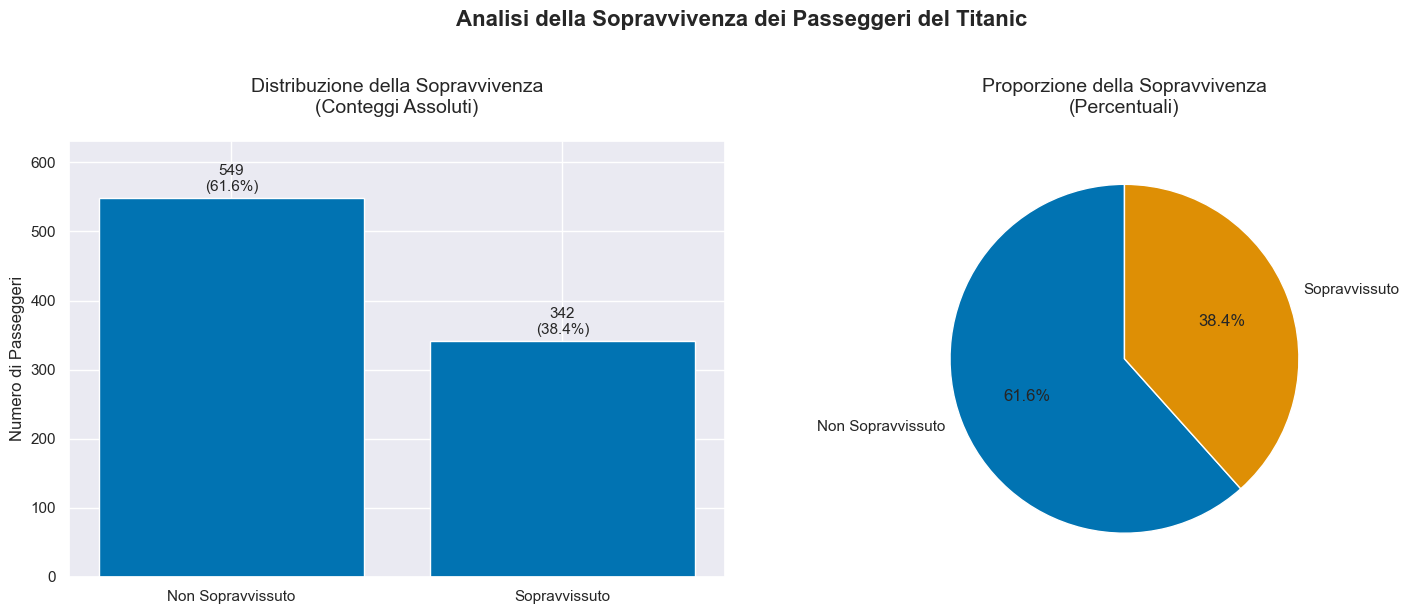

Totale Passeggeri: 891
Non Sopravvissuti: 549 (61.6%)
Sopravvissuti: 342 (38.4%)


In [16]:
# Statistiche di base
survival_counts = df['Survived'].value_counts().sort_index()
survival_percentages = survival_counts / len(df) * 100
labels = ['Non Sopravvissuto', 'Sopravvissuto']

# Figura con subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# BAR CHART 
bars = ax1.bar(labels, survival_counts.values)
for bar, count, pct in zip(bars, survival_counts.values, survival_percentages.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11)

ax1.set_title('Distribuzione della Sopravvivenza\n(Conteggi Assoluti)', fontsize=14, pad=20)
ax1.set_ylabel('Numero di Passeggeri', fontsize=12)
ax1.set_ylim(0, max(survival_counts.values) * 1.15)

# PIE CHART 
ax2.pie(survival_counts.values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90)
ax2.set_title('Proporzione della Sopravvivenza\n(Percentuali)', fontsize=14, pad=20)

fig.suptitle('Analisi della Sopravvivenza dei Passeggeri del Titanic', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

total_passengers = len(df)

print(f"Totale Passeggeri: {total_passengers}")
print(f"Non Sopravvissuti: {survival_counts[0]} ({survival_percentages[0]:.1f}%)")
print(f"Sopravvissuti: {survival_counts[1]} ({survival_percentages[1]:.1f}%)")


Il grafico sintetizza la distribuzione della variabile “Sopravvivenza” sull’intero campione (n=891) e mostra una netta prevalenza dei non sopravvissuti: 549 casi, pari al 61,6%, contro 342 sopravvissuti (38,4%). La barra dei conteggi assoluti evidenzia chiaramente questa asimmetria, mentre il grafico a torta conferma la differenza in termini percentuali. In termini descrittivi, la probabilità marginale di sopravvivere nel campione è 0,384, quella di non sopravvivere 0,616. Non emergono problemi di completezza per questa variabile, perché la somma dei due conteggi coincide con il totale dei record visualizzato. La distribuzione è quindi sbilanciata e indica che l’evento “sopravvivenza” è meno frequente rispetto alla “non sopravvivenza”. Questo quadro di base suggerisce, per l’esplorazione successiva, di scomporre la variabile per sottogruppi informativi (sesso, classe, età, porto d’imbarco) per verificare dove si concentri la differenza osservata e se emergano gradienti sistematici all’interno della popolazione analizzata.

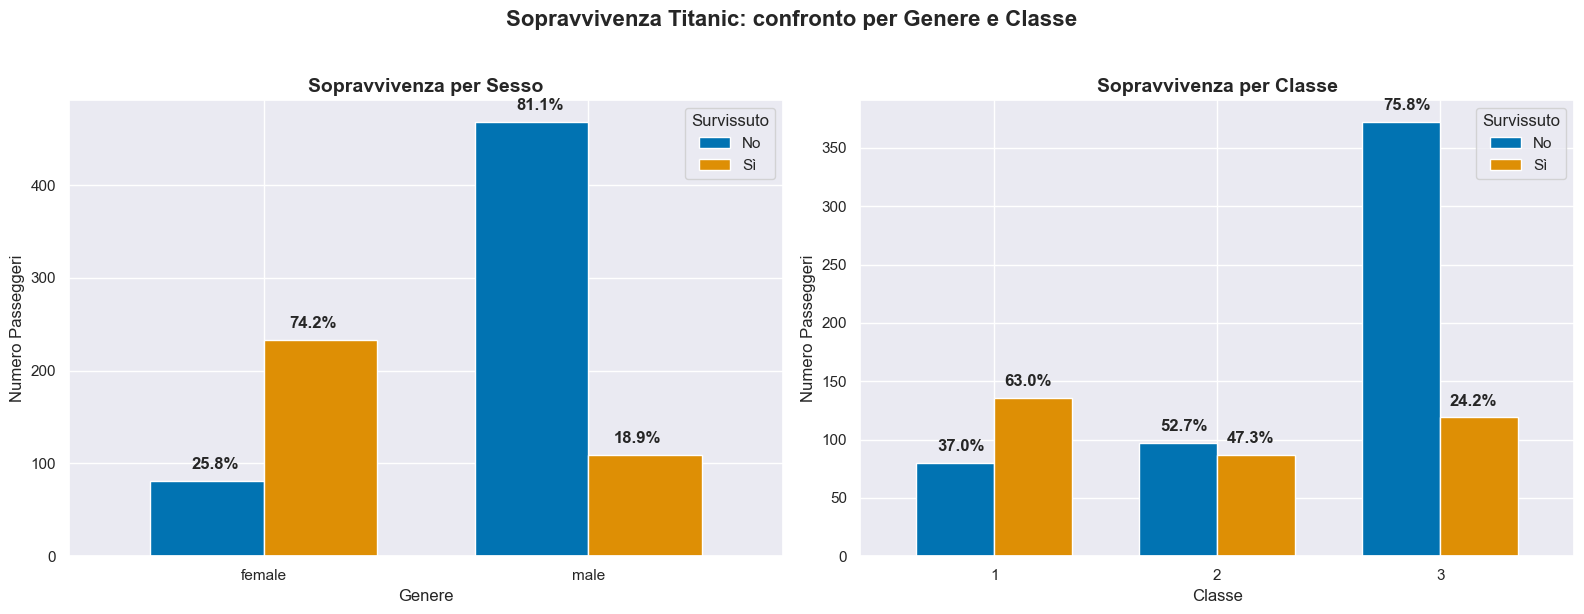

Percentuale di sopravvivenza per Genere:
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908

Percentuale di sopravvivenza per Classe:
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


In [17]:
# Calcolo conteggi e percentuali
sex_counts = df.groupby(['Sex', 'Survived']).size().unstack().fillna(0)
class_counts = df.groupby(['Pclass', 'Survived']).size().unstack().fillna(0)

sex_percent = sex_counts.div(sex_counts.sum(axis=1), axis=0) * 100
class_percent = class_counts.div(class_counts.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

#  Sopravvivenza per genere 
sex_counts.plot(kind='bar', ax=ax1, width=0.7)
ax1.set_title('Sopravvivenza per Sesso', fontsize=14, fontweight='bold')
ax1.set_ylabel('Numero Passeggeri')
ax1.set_xlabel('Genere')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.legend(title='Survissuto', labels=['No', 'Sì'])

# Percentuali sopra le barre
for i, gender in enumerate(sex_counts.index):
    for j, survived in enumerate([0,1]):
        ax1.text(i + j*0.3 - 0.15, sex_counts.loc[gender, survived] + max(sex_counts.values.flatten())*0.02,
                 f"{sex_percent.loc[gender, survived]:.1f}%", ha='center', va='bottom', fontweight='bold')

#  Sopravvivenza per Classe 
class_counts.plot(kind='bar', ax=ax2, width=0.7)
ax2.set_title('Sopravvivenza per Classe', fontsize=14, fontweight='bold')
ax2.set_ylabel('Numero Passeggeri')
ax2.set_xlabel('Classe')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(title='Survissuto', labels=['No', 'Sì'])

# Percentuali sopra le barre
for i, cls in enumerate(class_counts.index):
    for j, survived in enumerate([0,1]):
        ax2.text(i + j*0.3 - 0.15, class_counts.loc[cls, survived] + max(class_counts.values.flatten())*0.02,
                 f"{class_percent.loc[cls, survived]:.1f}%", ha='center', va='bottom', fontweight='bold')

# Titolo generale
fig.suptitle('Sopravvivenza Titanic: confronto per Genere e Classe', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Percentuale di sopravvivenza per genere
sex_survived = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()
print("Percentuale di sopravvivenza per Genere:")
print(sex_survived)

print("\nPercentuale di sopravvivenza per Classe:")
class_survived = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
print(class_survived)

L’analisi della sopravvivenza per genere mostra un’evidente differenza: tra le donne la quota di sopravvissuti è pari al 74,2%, mentre tra gli uomini si ferma solo al 18,9%. Questo dato riflette con chiarezza la regola prioritaria di evacuazione “donne e bambini primi sulle scialuppe” e indica che il genere è stato un fattore determinante per la probabilità di salvezza.

Anche la suddivisione per classe rivela un forte gradiente: i passeggeri di prima classe hanno avuto una sopravvivenza del 63%, più elevata rispetto alla media generale, mentre quelli di seconda classe presentano una distribuzione più equilibrata (52,7% non sopravvissuti e 47,3% sopravvissuti). Decisamente più svantaggiati sono i passeggeri di terza classe, per i quali la quota di sopravvivenza scende al 24,2%.

Questa differenza tra le classi non è soltanto il riflesso di uno status sociale, ma appare legata anche a fattori strutturali e logistici della nave. I passeggeri di prima classe erano alloggiati nei ponti più alti, in prossimità delle scialuppe di salvataggio e con un accesso più rapido alle vie di evacuazione. Al contrario, quelli di terza classe si trovavano nei ponti più bassi e periferici, spesso stipati in spazi ristretti, con corridoi angusti e barriere che ne rallentavano i movimenti. Questa collocazione più sfavorevole ha contribuito a ridurre drasticamente le loro possibilità di mettersi in salvo.

In sintesi, i grafici evidenziano come la probabilità di sopravvivere fosse significativamente maggiore per le donne e per i viaggiatori delle classi più alte, mentre gli uomini e i passeggeri di terza classe hanno subito le percentuali più alte di vittime. I dati confermano che fattori sociali e strutturali hanno inciso profondamente sugli esiti della tragedia.

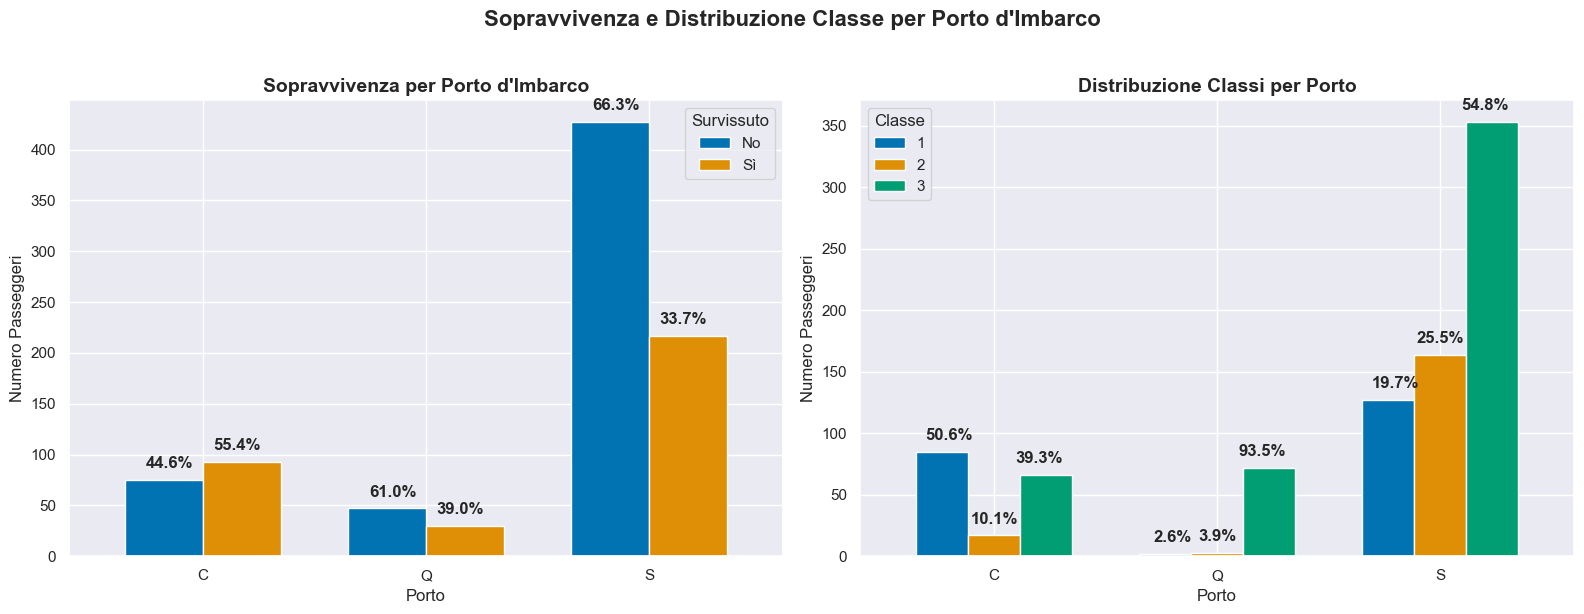

Percentuale di sopravvivenza per Porto d'Imbarco:
Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957

Percentuale di Distribuzione Classi per Porto d'Imbarco:
Pclass           1         2         3
Embarked                              
C         0.505952  0.101190  0.392857
Q         0.025974  0.038961  0.935065
S         0.197205  0.254658  0.548137


In [18]:
# Sopravvivenza per porto
port_survival_counts = df.groupby(['Embarked', 'Survived']).size().unstack().fillna(0)
port_survival_percent = port_survival_counts.div(port_survival_counts.sum(axis=1), axis=0) * 100

# Distribuzione classi per porto
port_class_counts = df.groupby(['Embarked', 'Pclass']).size().unstack().fillna(0)
port_class_percent = port_class_counts.div(port_class_counts.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

#  Sopravvivenza per Porto 
port_survival_counts.plot(kind='bar', ax=ax1, width=0.7)
ax1.set_title('Sopravvivenza per Porto d\'Imbarco', fontsize=14, fontweight='bold')
ax1.set_ylabel('Numero Passeggeri')
ax1.set_xlabel('Porto')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.legend(title='Survissuto', labels=['No', 'Sì'])

# Percentuali sopra le barre
for i, port in enumerate(port_survival_counts.index):
    for j, survived in enumerate([0,1]):
        ax1.text(i + j*0.3 - 0.15, port_survival_counts.loc[port, survived] + max(port_survival_counts.values.flatten())*0.02,
                 f"{port_survival_percent.loc[port, survived]:.1f}%", ha='center', va='bottom', fontweight='bold')

#  Distribuzione Classi per Porto 
port_class_counts.plot(kind='bar', ax=ax2, width=0.7)
ax2.set_title('Distribuzione Classi per Porto', fontsize=14, fontweight='bold')
ax2.set_ylabel('Numero Passeggeri')
ax2.set_xlabel('Porto')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(title='Classe')

# Percentuali sopra le barre
for i, port in enumerate(port_class_counts.index):
    for j, cls in enumerate(port_class_counts.columns):
        ax2.text(i + j*0.2 - 0.2, port_class_counts.loc[port, cls] + max(port_class_counts.values.flatten())*0.02,
                 f"{port_class_percent.loc[port, cls]:.1f}%", ha='center', va='bottom', fontweight='bold')

# Titolo generale
fig.suptitle('Sopravvivenza e Distribuzione Classe per Porto d\'Imbarco', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


# Percentuale di sopravvivenza per porto
port_survived = df.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack()
print("Percentuale di sopravvivenza per Porto d'Imbarco:")
print(port_survived)

# Percentuale di distribuzione classi per porto
port_class = df.groupby('Embarked')['Pclass'].value_counts(normalize=True).unstack()
print("\nPercentuale di Distribuzione Classi per Porto d'Imbarco:")
print(port_class)

L'analisi dei dati per porto d'imbarco rivela differenze significative nella sopravvivenza: Cherbourg (C) registra il tasso più alto con il 55,4%, seguito da Queenstown (Q)  con il 39,0% e Southampton (S) con il più basso 33,7%.
Queste disparità riflettono direttamente la composizione sociale dei passeggeri per porto. Cherbourg si distingue per una popolazione privilegiata: 50,6% in prima classe e 39.3% in terza classe. 

Al contrario, Queenstown presenta una composizione svantaggiata con il 93,5% di passeggeri in terza classe. Southampton mostra una distribuzione intermedia con prevalenza della terza classe (54,8%).

Il porto d'imbarco emerge quindi come predittore indiretto delle possibilità di sopravvivenza, correlato alla stratificazione sociale: il porto con maggiore concentrazione di passeggeri delle classi superiori ha registrato tassi di sopravvivenza più elevati, confermando l'influenza determinante dello status socio-economico sull'esito della tragedia.

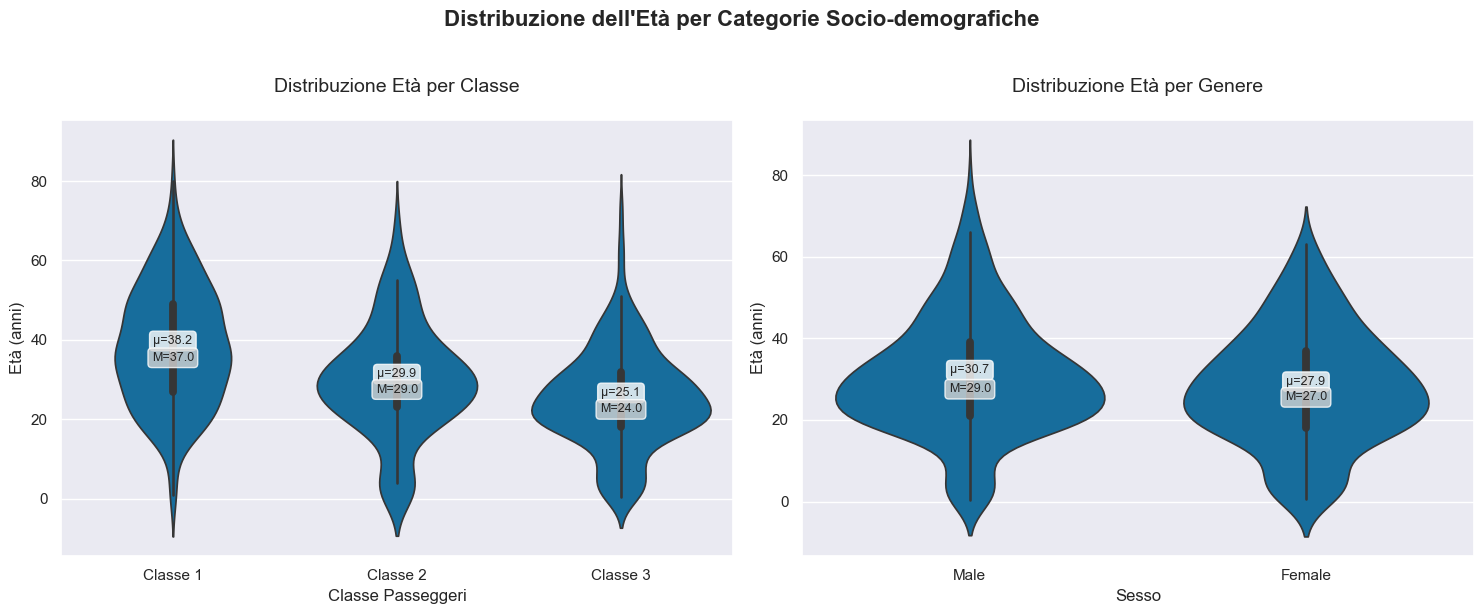


 ETÀ PER CLASSE PASSEGGERI:
  Classe 1: n=186, Media=38.23, Mediana=37.00, Dev.std=14.80
  Classe 2: n=173, Media=29.88, Mediana=29.00, Dev.std=14.00
  Classe 3: n=355, Media=25.14, Mediana=24.00, Dev.std=12.50

 ETÀ PER GENERE:
  Female: n=261, Media=27.92, Mediana=27.00, Dev.std=14.11
  Male: n=453, Media=30.73, Mediana=29.00, Dev.std=14.68

ETÀ PER CLASSE E GENERE:
  Classe 1 - Female: Media=34.61, Mediana=35.00, n=85
  Classe 1 - Male: Media=41.28, Mediana=40.00, n=101
  Classe 2 - Female: Media=28.72, Mediana=28.00, n=74
  Classe 2 - Male: Media=30.74, Mediana=30.00, n=99
  Classe 3 - Female: Media=21.75, Mediana=21.50, n=102
  Classe 3 - Male: Media=26.51, Mediana=25.00, n=253

Dati basati su 714 passeggeri con età nota su 891 totali


In [19]:
# Rimuovo valori mancanti per i calcoli
df_clean = df.dropna(subset=['Age'])

# Figura con subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#  GRAFICO 1: VIOLIN PLOT PER CLASSE 
sns.violinplot(data=df_clean, x='Pclass', y='Age', ax=ax1)
ax1.set_title('Distribuzione Età per Classe', fontsize=14, pad=20)
ax1.set_xlabel('Classe Passeggeri', fontsize=12)
ax1.set_ylabel('Età (anni)', fontsize=12)

# Fix per le etichette
class_labels = [f'Classe {i}' for i in sorted(df_clean['Pclass'].unique())]
ax1.set_xticks(range(len(class_labels)))
ax1.set_xticklabels(class_labels)

# Aggiunta statistiche sui violin
pclass_stats = df_clean.groupby('Pclass')['Age'].agg(['mean', 'median'])
for i, pclass in enumerate(sorted(df_clean['Pclass'].unique())):
    mean_val = pclass_stats.loc[pclass, 'mean']
    median_val = pclass_stats.loc[pclass, 'median']
    ax1.text(i, mean_val, f'μ={mean_val:.1f}', ha='center', va='bottom', 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8), fontsize=9)
    ax1.text(i, median_val, f'M={median_val:.1f}', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.8), fontsize=9)

# GRAFICO 2: VIOLIN PLOT PER GENERE 
sns.violinplot(data=df_clean, x='Sex', y='Age', ax=ax2)
ax2.set_title('Distribuzione Età per Genere', fontsize=14, pad=20)
ax2.set_xlabel('Sesso', fontsize=12)
ax2.set_ylabel('Età (anni)', fontsize=12)

# Fix per le etichette
sex_labels = [sex.capitalize() for sex in df_clean['Sex'].unique()]
ax2.set_xticks(range(len(sex_labels)))
ax2.set_xticklabels(sex_labels)

# Aggiunta statistiche sui violin
sex_stats = df_clean.groupby('Sex')['Age'].agg(['mean', 'median'])
for i, sex in enumerate(df_clean['Sex'].unique()):
    mean_val = sex_stats.loc[sex, 'mean']
    median_val = sex_stats.loc[sex, 'median']
    ax2.text(i, mean_val, f'μ={mean_val:.1f}', ha='center', va='bottom',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8), fontsize=9)
    ax2.text(i, median_val, f'M={median_val:.1f}', ha='center', va='top',
             bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgray', alpha=0.8), fontsize=9)

fig.suptitle('Distribuzione dell\'Età per Categorie Socio-demografiche', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Statistiche dettagliate
print("\n ETÀ PER CLASSE PASSEGGERI:")
pclass_simple_stats = df_clean.groupby('Pclass')['Age'].agg(['count', 'mean', 'median', 'std'])
for pclass, stats in pclass_simple_stats.iterrows():
    print(f"  Classe {int(pclass)}: n={int(stats['count'])}, "
          f"Media={stats['mean']:.2f}, "
          f"Mediana={stats['median']:.2f}, "
          f"Dev.std={stats['std']:.2f}")

print("\n ETÀ PER GENERE:")
sex_simple_stats = df_clean.groupby('Sex')['Age'].agg(['count', 'mean', 'median', 'std'])
for sex, stats in sex_simple_stats.iterrows():
    print(f"  {sex.capitalize()}: n={int(stats['count'])}, "
          f"Media={stats['mean']:.2f}, "
          f"Mediana={stats['median']:.2f}, "
          f"Dev.std={stats['std']:.2f}")

print("\nETÀ PER CLASSE E GENERE:")
combined_stats = df_clean.groupby(['Pclass', 'Sex'])['Age'].agg(['mean', 'median', 'count']).round(2)
for (pclass, sex), stats in combined_stats.iterrows():
    print(f"  Classe {int(pclass)} - {sex.capitalize()}: "
          f"Media={stats['mean']:.2f}, "
          f"Mediana={stats['median']:.2f}, "
          f"n={int(stats['count'])}")

print(f"\nDati basati su {len(df_clean)} passeggeri con età nota su {len(df)} totali")



L'analisi della distribuzione dell'età rivela pattern chiari legati allo status socio-economico dei passeggeri.
Per classe emerge un gradiente d'età decrescente: prima classe con età mediana di 37 anni, seconda classe a 29 anni e terza classe a soli 24 anni. Questo riflette la correlazione tra età e stabilità economica, con le classi superiori caratterizzate da passeggeri adulti maturi e la terza classe dominata da giovani emigranti.

La distribuzione per genere mostra differenze modeste: uomini con età mediana di 29 anni e donne di 27 anni. Tuttavia, analizzando classe e genere insieme, emergono specificità interessanti: in prima classe gli uomini sono più anziani (40 vs 35 anni), mentre in terza classe la popolazione femminile è particolarmente giovane (21.5 anni).

La forma dei grafici violin conferma che la prima classe presentava una distribuzione età più uniforme, la seconda classe mostrava due picchi generazionali, mentre la terza classe era fortemente concentrata nelle fasce giovanili. Questi dati confermano come l'età fosse un indicatore dello status sociale a bordo del Titanic.

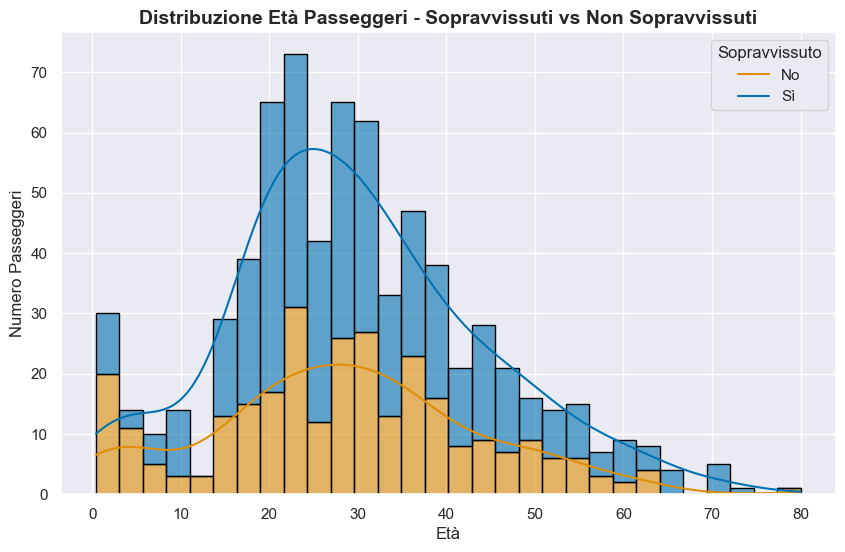

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack',
             edgecolor='black', bins=30, kde=True, alpha=0.6)

plt.title('Distribuzione Età Passeggeri - Sopravvissuti vs Non Sopravvissuti', fontsize=14, fontweight='bold')
plt.xlabel('Età')
plt.ylabel('Numero Passeggeri')
plt.legend(title='Sopravvissuto', labels=['No', 'Sì'])

plt.show()


L'istogramma sovrapposto rivela pattern significativi nella distribuzione dell'età tra sopravvissuti e non sopravvissuti. La popolazione del Titanic mostra una concentrazione nelle fasce d'età giovani-adulte (20-40 anni), con un picco pronunciato intorno ai 20-25 anni.
L'analisi comparativa evidenzia che i sopravvissuti (blu) mostrano una distribuzione più equilibrata nelle fasce d'età centrali, mentre i non sopravvissuti (arancione) dominano numericamente in quasi tutte le fasce, riflettendo il tasso complessivo di mortalità del 62%. Particolarmente rilevante è la rappresentanza dei sopravvissuti nelle fasce giovanili e di mezza età (15-45 anni), dove la proporzione di salvati appare relativamente più favorevole.

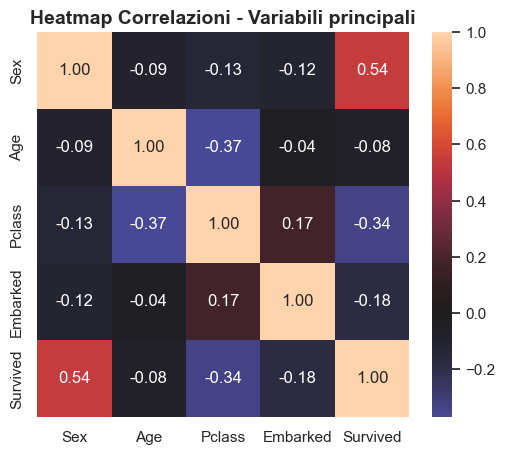

In [22]:
# Copia dei dati 
df_corr = df[['Sex', 'Age', 'Pclass', 'Embarked', 'Survived']].copy() 

# Converto le variabili categoriche in numeriche 
df_corr['Sex'] = df_corr['Sex'].map({'male':0, 'female':1})
df_corr['Embarked'] = df_corr['Embarked'].astype('category').cat.codes 

#Calcolo la matrice di correlazione 
corr_matrix = df_corr.corr() 

# Heatmap 
plt.figure(figsize=(6,5)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", center=0) 
plt.title("Heatmap Correlazioni - Variabili principali", fontsize=14, fontweight='bold') 
plt.show()

La matrice di correlazione rivela relazioni significative tra le variabili chiave del dataset. La correlazione più forte emerge tra Sesso (Sex) e Sopravvivenza (Survived) con un coefficiente di 0.54, confermando quantitativamente l'effetto determinante del genere sulla probabilità di salvezza, coerente con la priorità "donne e bambini primi".
L'Età (Age) presenta correlazioni moderate ma significative: negativa con la Classe (-0.37), indicando che passeggeri più anziani tendevano a viaggiare in classi superiori.

La Classe (Pclass) mostra una correlazione negativa con la Sopravvivenza (-0.34), confermando che classi numericamente più basse (prima e seconda) avevano maggiori probabilità di salvezza. Interessante la correlazione positiva tra Classe ed Embarked (0.17), riflettendo la stratificazione sociale per porto d'imbarco già osservata.
Le correlazioni più deboli (intorno a ±0.1-0.2) tra le altre variabili indicano relazioni presenti ma non dominanti, suggerendo che genere e classe sociale rimasero i predittori primari della sopravvivenza, mentre età e porto d'imbarco giocarono ruoli complementari ma meno determinanti.

## Conclusioni dell’Analisi Esplorativa sul Titanic

L’esame dei dati mostra che la sopravvivenza non fu un evento casuale, ma seguì logiche ben definite legate a fattori socio-demografici e strutturali.

### Principali determinanti

- **Genere:** rappresenta la variabile più influente (correlazione 0,54). La sopravvivenza femminile raggiunge il 74,2%, contro appena il 18,9% degli uomini.  
- **Classe di viaggio:** emerge un chiaro gradiente sociale. In prima classe sopravvive il 63% dei passeggeri, in seconda il 47,3%, mentre in terza solo il 24,2%.  
- **Età:** la relazione è negativa: i giovani adulti (20-40 anni) hanno maggiori probabilità di salvarsi, mentre gli anziani risultano più penalizzati.  
- **Porto di imbarco:** riflette indirettamente lo status socio-economico. I passeggeri partiti da Cherbourg mostrano una sopravvivenza del 55,4%, contro il 33,7 di Southampton (S).

### Pattern osservati

Le differenze sociali si riflettono anche nella struttura demografica delle classi:

- La prima classe è composta in prevalenza da adulti maturi (mediana 37 anni).  
- La terza classe accoglie soprattutto giovani migranti (mediana 24 anni).  
- Il porto di partenza accentua questa disparità: da Cherbourg proviene il 50,6% della prima classe, da Queenstown il 93,5% della terza.  

### Scelta delle variabili per modelli predittivi

- **Sex:** variabile cardine, con la maggiore capacità discriminante (correlazione 0,54) e la divisione più netta (74% vs 19%).  
- **Pclass:** secondo livello di stratificazione, con correlazione negativa (-0,34) e pattern ordinale chiaro.  
- **Age:** variabile continua con moderata capacità predittiva (-0,08), utile per individuare soglie numeriche.  
- **Embarked:** variabile categorica di supporto, capace di cogliere aspetti socio-economici e geografici non spiegati da altri fattori.  

La logica di questa selezione è che **Sex** fornisce il primo punto di separazione più pulito, **Pclass** aggiunge la componente di stratificazione sociale, **Age** introduce una soglia quantitativa, mentre **Embarked** intercetta variazioni residue legate al contesto socio-geografico.


## 2. Suddivisione del dataset

In [23]:
# Stabilisco features e target
X = df[['Sex', 'Age', 'Pclass', 'Embarked']]
y = df['Survived']

# Stampo dimensione X y 
print(X.shape)
print(y.shape)

(891, 4)
(891,)


In [24]:
# Prima divisione in training e in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("Dimensioni di X_train: ", X_train.shape)
print("Dimensioni di X_test: ", X_test.shape)
print("Dimensioni di y_train: ", y_train.shape)
print("Dimensioni di y_test: ", y_test.shape)

Dimensioni di X_train:  (668, 4)
Dimensioni di X_test:  (223, 4)
Dimensioni di y_train:  (668,)
Dimensioni di y_test:  (223,)


In [25]:
# Seconda divisione del trainig set, suddiviso in train e validation
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

print("Dimensioni di X_train_new: ", X_train_new.shape)
print("Dimensioni di X_val: ", X_val.shape)
print("Dimensioni di y_train_new: ", y_train_new.shape)
print("Dimensioni di y_val: ", y_val.shape)

Dimensioni di X_train_new:  (501, 4)
Dimensioni di X_val:  (167, 4)
Dimensioni di y_train_new:  (501,)
Dimensioni di y_val:  (167,)


## 3. Grid Search CV

### Gestione dei valori mancanti nella variabile "Age"

Per comprendere l’impatto delle diverse modalità di trattamento dei valori mancanti sulla qualità delle previsioni, è stata realizzata un’analisi comparativa che mette a confronto più strategie di imputazione:

1. Rimozione dei record incompleti: in questo caso le osservazioni prive di informazione sull’età vengono eliminate dal dataset. La procedura è immediata ma riduce sensibilmente la numerosità del campione disponibile per l’analisi, con potenziale perdita di informazioni utili.

2. Sostituzione con la media globale: i valori mancanti vengono rimpiazzati con la media dell’età calcolata su tutta la colonna. È una soluzione semplice ed efficiente dal punto di vista computazionale, che preserva il numero di osservazioni, ma rischia di appiattire la distribuzione e di non riflettere differenze strutturali presenti nei dati.

3. Imputazione tramite mediana: in alternativa alla media, si utilizza la mediana della distribuzione come valore sostitutivo. Questo approccio è più robusto in presenza di outlier e mantiene una rappresentazione più fedele delle età centrali.

4. Imputazione basata su sottogruppi (Pclass e Sex): l’età mancante viene imputata calcolando la mediana all’interno di gruppi omogenei, definiti dalla combinazione tra classe del biglietto e sesso. Tale metodo è più articolato e consente di rispettare meglio la struttura dei dati, assumendo che l’età di un passeggero sia più simile a quella di individui con caratteristiche socio-demografiche analoghe.

Per ogni strategia il modello Decision Tree sarà ottimizzato con la tecnica della Grid Search, così da individuare i migliori iperparametri e consentire un confronto equo delle prestazioni.

Il raffronto dei risultati in termini di accuratezza permetterà di stabilire quale procedura di imputazione risulti più adatta a questo dataset, fornendo una motivazione solida e guidata dai dati alla scelta finale.

### Test numero 1 ( rimozione valori nulli )

In [26]:
# Creo una copia del dataframe
df_GS_1 = df.copy()

# Rimuovo i valori mancanti nella colonna "Age" 
df_GS_1.dropna(subset=['Age'], inplace=True)

print(df_GS_1.shape)

(714, 5)


In [27]:
# Definizione feature e target
X_GS_1 = df_GS_1[['Sex', 'Age', 'Pclass', 'Embarked']]
y_GS_1 = df_GS_1['Survived']

# Applico One_Hot Encoding alla colonne categoriche
X_GS_1 = pd.get_dummies(X_GS_1, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True, dtype=int)

# Suddivisione dataframe in training e test
X_train_GS_1, X_test_GS_1, y_train_GS_1, y_test_GS_1 = train_test_split(X_GS_1, y_GS_1, test_size=0.25, random_state=0)

In [28]:
# Addestramento del modello e grid search
dt_classifier = DecisionTreeClassifier(random_state=0)

# definizione iperparametri da testare
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10],   # Numero minimo di campioni richiesti per dividere un nodo interno
    'criterion': ['gini', 'entropy']   # Funzione per misurare la qualità di una divisione
}
# Impostazione gridsearchcv
grid_search_1 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit sui dati di training
grid_search_1.fit(X_train_GS_1, y_train_GS_1)

# Stampa dei migliori iperparametri trovati e del miglior punteggio di cross-validation.
print(f"\nMigliori iperparametri rimuovendo valori nulli : {grid_search_1.best_params_}")
print(f"Miglior accuratezza in Cross-Validation rimuovendo valori nulli : {grid_search_1.best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Migliori iperparametri rimuovendo valori nulli : {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Miglior accuratezza in Cross-Validation rimuovendo valori nulli : 0.8000


In [29]:
# Valutazione del miglior modello su test.
best_model_GS_1 = grid_search_1.best_estimator_
y_pred_GS_1 = best_model_GS_1.predict(X_test_GS_1)
accuracy_GS_1 = accuracy_score(y_test_GS_1, y_pred_GS_1)

# Stampa dell'accuratezza finale rimuovendo valori nulli.
print(f"Accuratezza finale sul Test Set rimuovendo valori nulli: {accuracy_GS_1:.4f}")

Accuratezza finale sul Test Set rimuovendo valori nulli: 0.7821


### Test numero 2 ( sostituzione  valori nulli con media )

In [30]:
# Creo una copia del dataframe
df_GS_2 = df.copy()

# Media colonna 'Age'
mean_age = df_GS_2['Age'].mean()

# I valori nulli vengono sostitui con la media
df_GS_2['Age'] = df_GS_2['Age'].fillna(mean_age)

print(df_GS_2.shape)
print(df_GS_2['Age'].isnull().sum())

(891, 5)
0


In [31]:
# Definizione feature e target
X_GS_2 = df_GS_2[['Sex', 'Age', 'Pclass', 'Embarked']]
y_GS_2 = df_GS_2['Survived']

# Applico One_Hot Encoding alla colonne categoriche
X_GS_2 = pd.get_dummies(X_GS_2, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True, dtype=int)

# Suddivisione dataframe in training e test
X_train_GS_2, X_test_GS_2, y_train_GS_2, y_test_GS_2 = train_test_split(X_GS_2, y_GS_2, test_size=0.25, random_state=0)

In [32]:
# Addestramento del modello e grid search
dt_classifier = DecisionTreeClassifier(random_state=0)

# definizione iperparametri da testare
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10],   # Numero minimo di campioni richiesti per dividere un nodo interno
    'criterion': ['gini', 'entropy']   # Funzione per misurare la qualità di una divisione
}
# Impostazione gridsearchcv
grid_search_2 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit sui dati di training
grid_search_2.fit(X_train_GS_2, y_train_GS_2)

# Stampa dei migliori iperparametri trovati e del miglior punteggio di cross-validation.
print(f"\nMigliori iperparametri sostituendo valori nulli con la media : {grid_search_2.best_params_}")
print(f"Miglior accuratezza in Cross-Validation sostituendo valori nulli con l'età media : {grid_search_2.best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Migliori iperparametri sostituendo valori nulli con la media : {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Miglior accuratezza in Cross-Validation sostituendo valori nulli con l'età media : 0.8248


In [33]:
# Valutazione del miglior modello su test.
best_model_GS_2 = grid_search_2.best_estimator_
y_pred_GS_2 = best_model_GS_2.predict(X_test_GS_2)
accuracy_GS_2 = accuracy_score(y_test_GS_2, y_pred_GS_2)

# Stampa dell'accuratezza finale rimuovendo valori nulli.
print(f"Accuratezza finale sul Test Set sostituendo i valori nulli con l'età media: {accuracy_GS_2:.4f}")

Accuratezza finale sul Test Set sostituendo i valori nulli con l'età media: 0.8117


### Test numero 3 ( sostituzione  valori nulli con la mediana )

In [34]:
# Creo una copia del dataframe
df_GS_3 = df.copy()

# Media colonna 'Age'
median_age = df_GS_3['Age'].median()

# I valori nulli vengono sostitui con la media
df_GS_3['Age'] = df_GS_3['Age'].fillna(median_age)

print(df_GS_3.shape)
print(df_GS_3['Age'].isnull().sum())

(891, 5)
0


In [35]:
# Definizione feature e target
X_GS_3 = df_GS_3[['Sex', 'Age', 'Pclass', 'Embarked']]
y_GS_3 = df_GS_3['Survived']

# Applico One_Hot Encoding alla colonne categoriche
X_GS_3 = pd.get_dummies(X_GS_3, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True, dtype=int)

# Suddivisione dataframe in training e test
X_train_GS_3, X_test_GS_3, y_train_GS_3, y_test_GS_3 = train_test_split(X_GS_3, y_GS_3, test_size=0.25, random_state=0)

In [36]:
# Addestramento del modello e grid search
dt_classifier = DecisionTreeClassifier(random_state=0)

# definizione iperparametri da testare
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10],   # Numero minimo di campioni richiesti per dividere un nodo interno
    'criterion': ['gini', 'entropy']   # Funzione per misurare la qualità di una divisione
}
# Impostazione gridsearchcv
grid_search_3 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit sui dati di training
grid_search_3.fit(X_train_GS_3, y_train_GS_3)

# Stampa dei migliori iperparametri trovati e del miglior punteggio di cross-validation.
print(f"\nMigliori iperparametri sostituendo valori nulli con l'età mediana : {grid_search_3.best_params_}")
print(f"Miglior accuratezza in Cross-Validation sostituendo valori nulli con l'età mediana : {grid_search_3.best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Migliori iperparametri sostituendo valori nulli con l'età mediana : {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Miglior accuratezza in Cross-Validation sostituendo valori nulli con l'età mediana : 0.8248


In [37]:
# Valutazione del miglior modello su test.
best_model_GS_3 = grid_search_3.best_estimator_
y_pred_GS_3 = best_model_GS_3.predict(X_test_GS_3)
accuracy_GS_3 = accuracy_score(y_test_GS_3, y_pred_GS_3)

# Stampa dell'accuratezza finale rimuovendo valori nulli.
print(f"Accuratezza finale sul Test Set sostituendo i valori nulli con l'età mediana: {accuracy_GS_3:.4f}")

Accuratezza finale sul Test Set sostituendo i valori nulli con l'età mediana: 0.8117


### Test numero 4 ( sostituzione  valori nulli con la mediana raggruppata per per ' Sex e 'Pclass' )

In [38]:
# Creo una copia del dataframe
df_GS_4 = df.copy()

# Età mediana per gruppi di classe per genere
median_age_pclass = df_GS_4.groupby(["Pclass", "Sex"])["Age"].median()

# Funzione per sostituire i valori mancanti nella colonna 'Age', con l'eta mediana per classe.
def test_4_age_group(row):
    """
    La funzione controlla se un valore è assente in  'Age' e
    lo sostituisce con l'età media del gruppo di riferimento.
    """
    if pd.isnull(row["Age"]):
        # L'età media del gruppo viene recuperata utilizzando gli indici 'Pclass' e 'Sex' della riga corrente.
        return median_age_pclass.loc[(row["Pclass"], row["Sex"])]
    return row["Age"]

# Applicazione della funzione
df_GS_4['Age'] = df_GS_4.apply(test_4_age_group, axis=1)

print(df_GS_3.shape)
print(df_GS_3['Age'].isnull().sum())

(891, 5)
0


In [39]:
# Definizione feature e target
X_GS_4 = df_GS_4[['Sex', 'Age', 'Pclass', 'Embarked']]
y_GS_4 = df_GS_4['Survived']

# Applico One_Hot Encoding alla colonne categoriche
X_GS_4 = pd.get_dummies(X_GS_4, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True, dtype=int)

# Suddivisione dataframe in training e test
X_train_GS_4, X_test_GS_4, y_train_GS_4, y_test_GS_4 = train_test_split(X_GS_3, y_GS_3, test_size=0.25, random_state=0)

In [40]:
# Addestramento del modello e grid search
dt_classifier = DecisionTreeClassifier(random_state=0)

# definizione iperparametri da testare
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Profondità massima dell'albero
    'min_samples_split': [2, 5, 10],   # Numero minimo di campioni richiesti per dividere un nodo interno
    'criterion': ['gini', 'entropy']   # Funzione per misurare la qualità di una divisione
}
# Impostazione gridsearchcv
grid_search_4 = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit sui dati di training
grid_search_4.fit(X_train_GS_4, y_train_GS_4)

# Stampa dei migliori iperparametri trovati e del miglior punteggio di cross-validation.
print(f"\nMigliori iperparametri sostituendo valori nulli con l'età medianaper genere raggruppata per classe : {grid_search_4.best_params_}")
print(f"Miglior accuratezza in Cross-Validation sostituendo valori nulli con l'età  mediana per genere raggruppata per classe : {grid_search_4.best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Migliori iperparametri sostituendo valori nulli con l'età medianaper genere raggruppata per classe : {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Miglior accuratezza in Cross-Validation sostituendo valori nulli con l'età  mediana per genere raggruppata per classe : 0.8248


In [41]:
# Valutazione del miglior modello su test.
best_model_GS_4 = grid_search_4.best_estimator_
y_pred_GS_4 = best_model_GS_4.predict(X_test_GS_4)
accuracy_GS_4 = accuracy_score(y_test_GS_4, y_pred_GS_4)

# Stampa dell'accuratezza finale rimuovendo valori nulli.
print(f"Accuratezza finale sul Test Set sostituendo i valori nulli con l'età mediana raggruppata per classe: {accuracy_GS_4:.4f}")

Accuratezza finale sul Test Set sostituendo i valori nulli con l'età mediana raggruppata per classe: 0.8117


# Risultati dell'Analisi Comparativa

L'analisi comparativa ha valutato diverse strategie per la gestione dei valori mancanti nella colonna **'Age'**. Per ciascuno scenario, il modello **Decision Tree** è stato ottimizzato tramite **Grid Search**, permettendo di individuare l'approccio più efficace basato sui dati.

## Sintesi dei Test e Accuratezze

Di seguito sono riportati i risultati per ciascuno scenario, comprese le migliori configurazioni iperparametriche e le accuratezze ottenute in **Cross-Validation** e sul **Test Set**.

### Test 1: Eliminazione delle osservazioni mancanti
- **Migliori iperparametri:** `{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}`
- **Cross-Validation:** 0.8000  
- **Accuratezza sul Test Set:** 0.7821

### Test 2: Imputazione con media
- **Migliori iperparametri:** `{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}`
- **Cross-Validation:** 0.8248  
- **Accuratezza sul Test Set:** 0.8117

### Test 3: Imputazione con mediana
- **Migliori iperparametri:** `{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}`
- **Cross-Validation:** 0.8248  
- **Accuratezza sul Test Set:** 0.8117

### Test 4: Imputazione con mediana raggruppata per **Pclass** e **Sex**
- **Migliori iperparametri:** `{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}`
- **Cross-Validation:** 0.8248  
- **Accuratezza sul Test Set:** 0.8117

## Conclusioni Principali

Dall'analisi dei risultati emerge che:

1. La semplice eliminazione dei valori nulli riduce la quantità di dati e produce la performance più bassa sul test set.  
2. L'imputazione con media o mediana migliora l'accuratezza, garantendo maggiore completezza dei dati.  
3. L'imputazione basata sulla mediana raggruppata per **classe di viaggio** e **genere** (Test 4) mantiene la performance elevata e, allo stesso tempo, rispetta la struttura socio-demografica dei passeggeri, preservando pattern importanti legati a **Pclass** e **Sex**.

**Motivazione per la scelta del Test 4:**  
Il Test 4 viene selezionato per le fasi successive perché combina:

- Accuratezza ottimale pari agli altri approcci basati sull'imputazione.  
- Maggiore coerenza con la struttura dei dati, riducendo il rischio di introdurre bias dovuti a valori medi generici.  
- Capacità di preservare differenze significative tra gruppi, fondamentali per la costruzione di modelli predittivi più realistici e robusti.


## 4. Sostituzione valori Mancanti

Nella colonna **Embarked** sono presenti due valori mancanti.  
Questi verranno sostituiti con la **moda**, in quanto rappresenta il valore più frequente e quindi più rappresentativo del dataset.


In [42]:
# Sostituzione valuri nulli in 'Embarked' con la moda
# Calcola la moda di 'Embarked' su X_train_new
moda_embarked_X_train_new = X_train_new["Embarked"].mode()[0]
print("Moda colonna 'Embarked' su X_train_new: ", moda_embarked_X_train_new)

# Imputazione su tutti i DataFrame
for df in [X_train_new, X_val, X_test]:
    df["Embarked"] = df["Embarked"].fillna(moda_embarked_X_train_new)

print("Valori mancanti in embarked :")
print(X_train_new['Embarked'].isnull().sum())
print(X_val['Embarked'].isnull().sum())
print(X_test['Embarked'].isnull().sum())

Moda colonna 'Embarked' su X_train_new:  S
Valori mancanti in embarked :
0
0
0


In [43]:
# Calcola la mediana per gruppo SOLO sul training set
median_age_lookup = X_train_new.groupby(['Pclass', 'Sex'])['Age'].median()
median_age_fallback = X_train_new['Age'].median()

for df in [X_train_new, X_val, X_test]:
    # Valori imputati per ogni riga usando la lookup table
    imputation_values = df.set_index(['Pclass', 'Sex']).index.map(median_age_lookup)
    # Assegnazione diretta
    df['Age'] = pd.Series(imputation_values, index=df.index).fillna(median_age_fallback)

# Controllo valori mancanti
print("\nMissing values in 'Age' after imputation:")
print(X_train_new['Age'].isnull().sum())
print(X_val['Age'].isnull().sum())
print(X_test['Age'].isnull().sum())


Missing values in 'Age' after imputation:
0
0
0


## 5. Codifica Variabili Categoriche con One-Hot

In [44]:
# Colonne categoriche da codificare
colonne_cate = ['Sex', 'Embarked', 'Pclass']

# Inizializzazione del OneHotEncoder
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit sul training set e trasformazione di train, validation e test
X_train_encoded = pd.DataFrame(
    one_hot.fit_transform(X_train_new[colonne_cate]),
    columns=one_hot.get_feature_names_out(colonne_cate),
    index=X_train_new.index
)
X_val_encoded = pd.DataFrame(
    one_hot.transform(X_val[colonne_cate]),
    columns=one_hot.get_feature_names_out(colonne_cate),
    index=X_val.index
)
X_test_encoded = pd.DataFrame(
    one_hot.transform(X_test[colonne_cate]),
    columns=one_hot.get_feature_names_out(colonne_cate),
    index=X_test.index
)

# Rimozione colonne originali e concatenazione
X_train_new = pd.concat([X_train_new.drop(columns=colonne_cate), X_train_encoded], axis=1)
X_val = pd.concat([X_val.drop(columns=colonne_cate), X_val_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=colonne_cate), X_test_encoded], axis=1)

# Controllo finale
print("Prime 5 righe del training set codificato:")
print(X_train_new.head())

# Visualizzazione delle informazioni sul DataFrame delle feature di training codificate
print("\nInformazioni su X_train_new dopo la codifica One-Hot:")
X_train_new.info()

# Aggounta di un controllo per X_val e X_test 
print("\nPrime 5 righe di X_val dopo la codifica One-Hot:")
print(X_val.head())
print("\nInformazioni su X_val dopo la codifica One-Hot:")
X_val.info()


Prime 5 righe del training set codificato:
              Age  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
PassengerId                                                                   
425          27.0         0.0       1.0         0.0         0.0         1.0   
813          29.0         0.0       1.0         0.0         0.0         1.0   
27           27.0         0.0       1.0         1.0         0.0         0.0   
832          29.0         0.0       1.0         0.0         0.0         1.0   
416          22.0         1.0       0.0         0.0         0.0         1.0   

             Pclass_1  Pclass_2  Pclass_3  
PassengerId                                
425               0.0       0.0       1.0  
813               0.0       1.0       0.0  
27                0.0       0.0       1.0  
832               0.0       1.0       0.0  
416               0.0       0.0       1.0  

Informazioni su X_train_new dopo la codifica One-Hot:
<class 'pandas.core.frame.DataFrame'>
In

## 6. Implementazione del Decision Tree Classifier

## Validazione della profondità dell'albero di decisione e valutazione sul Test Set

In questa fase, è stata determinata la **profondità ottimale** per un modello ad albero di decisione e successivamente valutate le prestazioni del modello selezionato su un **set di dati non visto**.

### Passaggi eseguiti

1. **Definizione delle profondità da testare:**  
   Sono stati scelti i valori `[2, 5, 10, 25, None]` come profondità massima dell'albero da valutare.

2. **Iterazione e valutazione sul Validation Set:**  
   Per ciascuna profondità, è stato creato un `DecisionTreeClassifier` con seme casuale fissato a 0 per garantire la riproducibilità. Il modello è stato addestrato sul training set e testato sul validation set. Le accuratezze ottenute sono state registrate:

3. **Identificazione della migliore profondità:**  
La profondità che ha prodotto la migliore accuratezza sul validation set è **5** (0.8263).

4. **Addestramento del modello finale:**  
L'albero di decisione con profondità ottimale è stato addestrato sull'intero training set, combinando training set originale e validation set, per sfruttare al massimo i dati disponibili.

5. **Valutazione sul Test Set:**  
Il modello finale è stato valutato sul test set, ottenendo un'accuratezza di **0.8117**, fornendo una stima affidabile delle capacità di generalizzazione del modello.

In [45]:
# Profondità da testare
depths_to_try = [2, 5, 10, 25, None]
val_accuracies = {}

# Si itera sulle diverse profondità
for depth in depths_to_try:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train_new, y_train_new)           # Train on training set
    y_val_pred = clf.predict(X_val)            # Predict on validation set
    val_accuracies[depth] = accuracy_score(y_val, y_val_pred)

# Migliore profondità
best_depth = max(val_accuracies, key=val_accuracies.get)
print("\nValidation accuracies for different depths:")
for d, acc in val_accuracies.items():
    print(f"  max_depth={d}: {acc:.4f}")
print(f"\nBest tree depth: {best_depth} with accuracy {val_accuracies[best_depth]:.4f}")

# Addestramwento su X_train_new concatenato con validation
X_train_full = pd.concat([X_train_new, X_val], ignore_index=False)
y_train_full = pd.concat([y_train_new, y_val], ignore_index=False)

final_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
final_clf.fit(X_train_full, y_train_full)

# Previsioni sul test set
y_test_pred = final_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nFinal model accuracy on test set: {test_accuracy:.4f}")


Validation accuracies for different depths:
  max_depth=2: 0.7904
  max_depth=5: 0.8263
  max_depth=10: 0.8263
  max_depth=25: 0.8263
  max_depth=None: 0.8263

Best tree depth: 5 with accuracy 0.8263

Final model accuracy on test set: 0.8117


### Conclusione

La selezione della profondità ottimale tramite validation set ha permesso di **bilanciare bias e varianza**, evitando l'overfitting. L'accuratezza finale sul test set (0.8117) conferma che l'albero di decisione configurato con **max_depth=5** generalizza bene a dati nuovi, rendendolo un modello affidabile per predire la sopravvivenza dei passeggeri del Titanic.


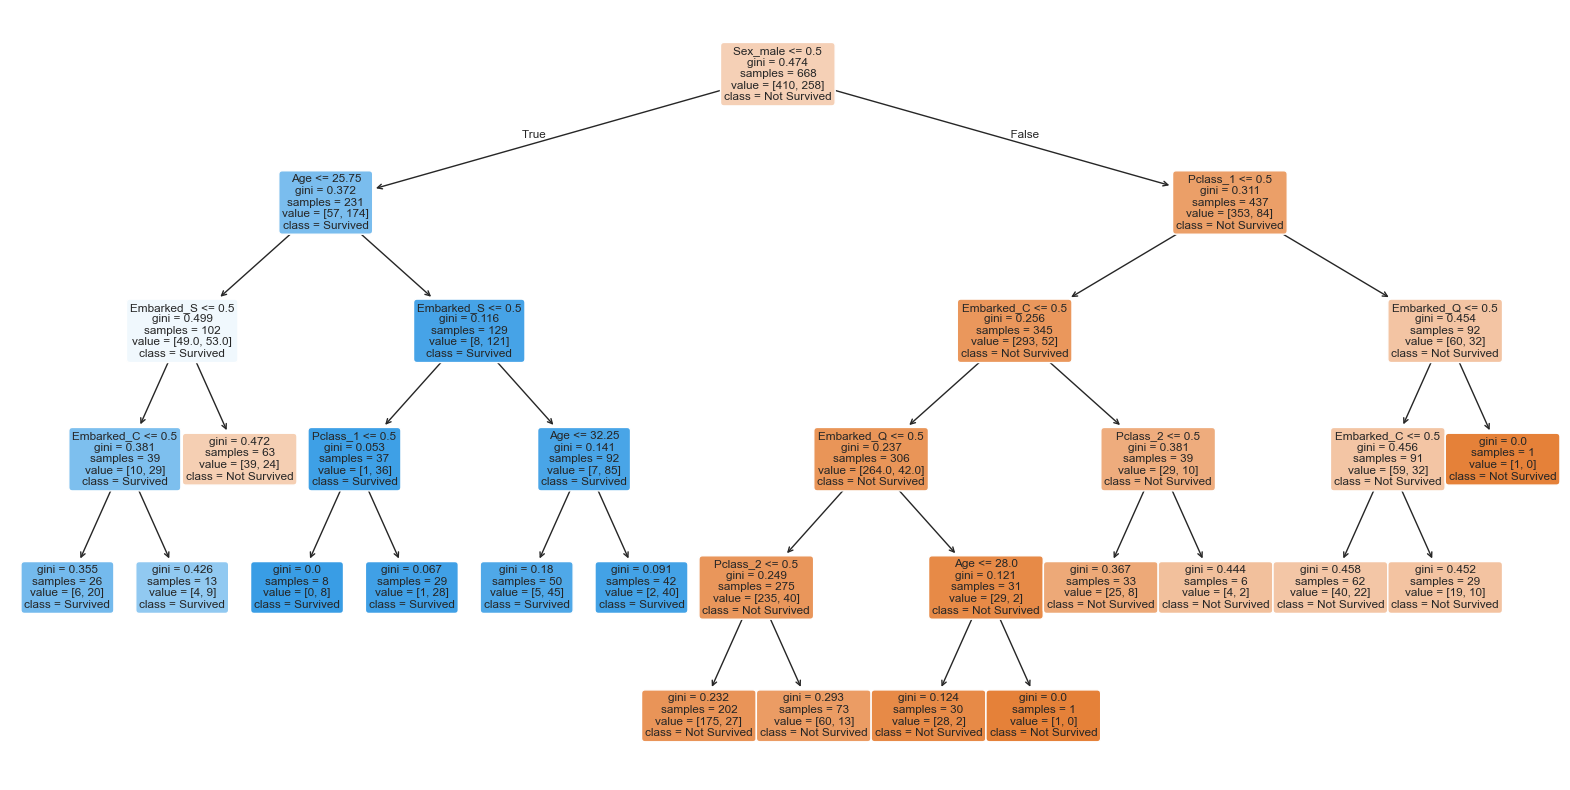

In [46]:

plt.figure(figsize=(20,10))  #
plot_tree(
    final_clf, 
    filled=True,          
    rounded=True,         
    feature_names=X_train_full.columns,   
    class_names=["Not Survived", "Survived"]  
)
plt.show()